# **Project Name**    - Bike Sharing Demand



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Shaikh Meraj

# **Project Summary -**

In this project, we explored bike-sharing demand data to understand factors influencing the rental patterns of bikes across various time periods, weather conditions, and seasonal events. The dataset included a rich array of variables, such as hourly bike counts, temperature, humidity, wind speed, visibility, dew point, solar radiation, rainfall, snowfall, and categorical features like season, holiday, and system functioning days. Our primary goal was to analyze and predict the "Rented Bike Count" based on these influential factors, with a focus on identifying patterns and building predictive models to aid decision-making in resource management and operational planning for bike-sharing systems.


We began by conducting exploratory data analysis (EDA), visualizing key trends and patterns. We assessed monthly, yearly, and seasonal trends in bike rentals, and visualized the effects of temperature and visibility on bike counts, uncovering higher rentals during warmer months and clearer days. A detailed analysis also highlighted trends in weekend and weeknight rentals between resort and city hotels, repeat guest percentages, and market segment bookings, giving us a broader context of travel behavior.


To deepen insights, we performed correlation analysis using a heatmap to identify significant relationships between numerical variables, revealing correlations above a 0.5 threshold. This helped us prioritize variables, like temperature and humidity, that showed stronger associations with bike demand. Following EDA, we prepared the data and split it into training and testing sets, with 80% used for training and 20% for testing, a standard ratio ensuring model robustness.


We implemented two machine learning models to predict bike demand: Linear Regression and Random Forest, evaluating them on root mean squared error (RMSE) and R² score metrics. Our initial models provided a baseline, while we further refined performance using hyperparameter tuning. For Linear Regression, we applied K-Fold cross-validation, and for Random Forest, we optimized using GridSearchCV, adjusting hyperparameters like the number of trees, depth, and minimum samples at leaf nodes. These improvements were visualized in comparison charts showing the model performance before and after tuning. Random Forest, particularly after tuning, emerged as the best-performing model with significant accuracy improvements (RMSE: 177.39, R²: 0.93).






# **GitHub Link -**

https://github.com/merajsultana/Hotel-Booking-Analysis/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb

# **Problem Statement**


**Write Problem Statement Here.**



The goal of this project is to analyze and predict bike-sharing demand in order to understand the key factors that influence rental patterns across different times, weather conditions, and seasons. For bike-sharing systems to operate efficiently, it's crucial to anticipate demand accurately, allowing for better resource management and optimal bike distribution. This project seeks to uncover insights into how factors like temperature, humidity, visibility, and holidays impact bike rentals, enabling the system to adapt to fluctuating demand. By developing predictive models, we aim to support data-driven decisions that enhance the reliability, availability, and convenience of bike-sharing services for users, especially during peak periods or adverse weather conditions. Ultimately, this analysis serves to help operators manage the system more effectively and to ensure user satisfaction by meeting demand consistently.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# let's mount the google drive first
# from google.colab import drive
# drive.mount('/content/drive')


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


<Axes: >

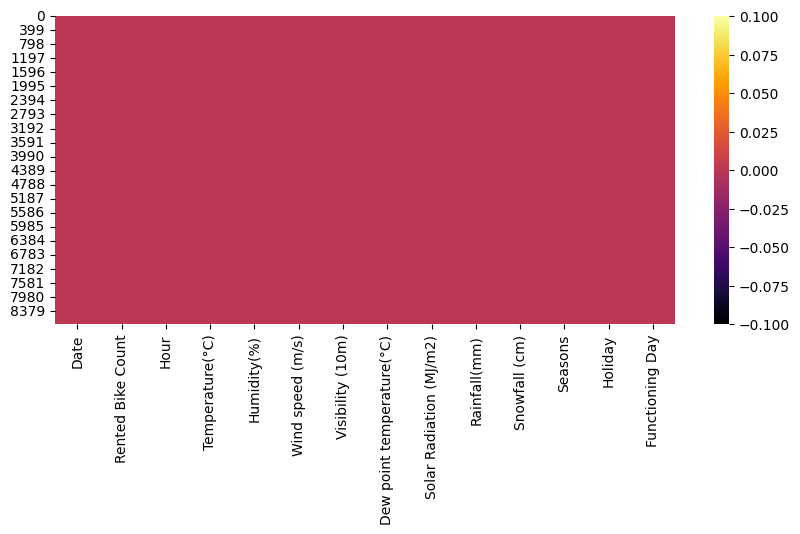

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cmap = 'inferno')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.



### What did you know about your dataset?

The dataset provided contains 14 columns and 8760 rows including both numerical and categorical variables. Key numerical features include temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, and snowfall. The target variable is the "Rented Bike Count," which indicates the number of bikes rented each hour. Categorical variables include seasons, holidays, and whether it was a functioning day or not. There are no missing or duplicate values in the dataset, meaning the data is complete and consistent, ready for analysis. Additionally, the dataset has both time-related information (e.g., date and hour) and weather-related data, which will help in predicting bike rentals based on external conditions.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

*   Date = Date


*   Hour = Hour of the day(0-23)



*   Tempretaure = Tempprature Of The Day


*  Humidity (%): The relative humidity, given as a percentage (integer type). It might affect how comfortable it is for people to ride bikes.





*   Wind Speed (m/s): The wind speed measured in meters per second (float type).


*   Visibility (10m): Visibility distance in units of 10 meters (integer type). Lower visibility, such as during foggy conditions, could impact bike usage.




*   Dew Point Temperature (°C): The temperature at which air becomes saturated with moisture (float type). This could influence comfort levels and thus bike rental behavior.



*   Solar Radiation (MJ/m²): The amount of solar radiation in megajoules per square meter (float type). Sunny weather may encourage people to rent bikes.




*   Rainfall (mm): The amount of rainfall in millimeters (float type). Rainy weather could negatively impact bike rental demand.



*   Snowfall (cm): The amount of snowfall in centimeters (float type). Snowy conditions are likely to reduce the number of bike rentals.




*   Seasons: The season of the observation (categorical: "Spring", "Summer", "Fall", "Winter").




*   Holiday: Whether the observation occurred on a holiday (categorical: "Yes", "No"). Bike rentals may vary depending on whether it is a holiday or a regular day.




*   Functioning Day: Indicates if the bike-sharing system was operational on that day (categorical: "Yes", "No").


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())


No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Convert 'Date' column with a specific format - changed format to match data format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'

# Extract useful date-time features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Handle missing date conversions
missing_dates = df[df['Date'].isna()]
if not missing_dates.empty:
    print(f"Rows with missing dates:\n{missing_dates}")

### What all manipulations have you done and insights you found?

In the Bike Sharing Demand Capstone project, data preprocessing confirmed that the dataset was free of null or duplicate values, allowing for efficient analysis. The Date column was transformed into a datetime format to enable time-based insights. We investigated how factors such as holidays, seasons, temperature, rainfall, and system operational status affected bike rental demand.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1


# **What patterns can be observed in the average bike rental counts across different months and seasons over the years?**

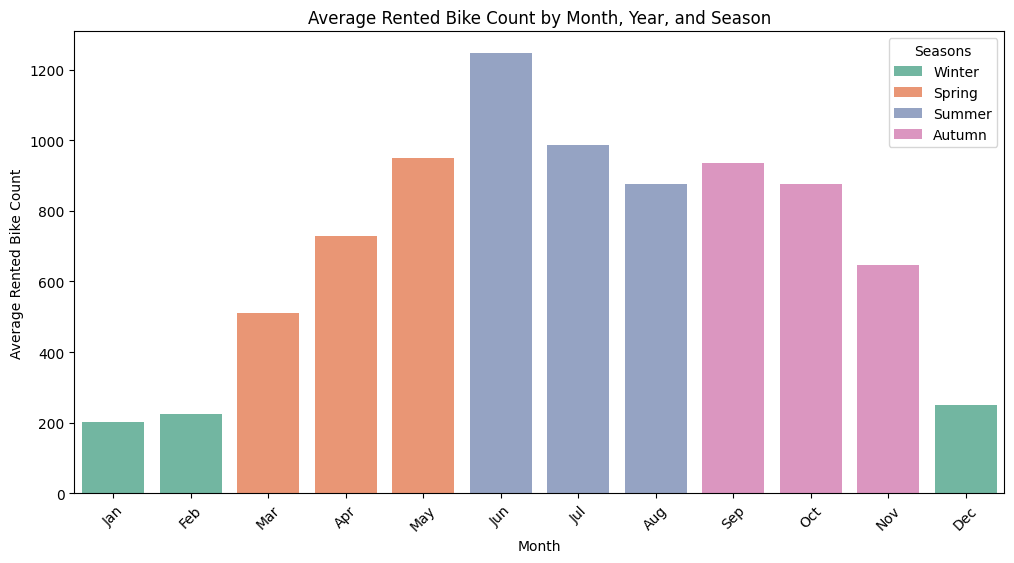

In [ ]:
# Chart - 1 visualization code
# Convert 'Date' column to datetime and extract the 'Month'
# Convert 'Date' column to datetime, extract 'Month' and 'Year'
# Convert 'Date' column to datetime, extract 'Month' and 'Year'
# Convert 'Date' column to datetime, extract 'Month' and 'Year'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.strftime('%b')  # Convert month number to abbreviated month name (Jan, Feb, etc.)
df['Year'] = df['Date'].dt.year

# Group by 'Year', 'Month', and 'Seasons' to calculate the average 'Rented Bike Count'
grouped_data = df.groupby(['Year', 'Month', 'Seasons'])['Rented Bike Count'].mean().reset_index()

# To ensure proper order of months, we can set the 'Month' column as a categorical type with proper ordering
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=months_order, ordered=True)

# Plotting a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Rented Bike Count', hue='Seasons', data=grouped_data, palette='Set2')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Month, Year, and Season')
plt.xticks(rotation=45)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the average rented bike count by month, year, and season because it effectively displays categorical data, making it easy to compare trends over time. The use of hues to represent different seasons allows for immediate visual differentiation, highlighting how seasonal changes impact bike rental demand. This format simplifies the interpretation of complex datasets by providing a clear view of monthly trends and seasonal variations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals distinct patterns in bike rentals, showing that summer months typically see higher rental counts compared to other seasons, with a notable peak during Jun,July and August. In contrast, the winter months exhibit significantly lower rental counts, suggesting that colder weather discourages bike usage. This seasonal insight indicates that marketing strategies could be adjusted to promote rentals during peak months while considering offers or discounts in off-peak seasons to stimulate demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can positively influence business strategies. By identifying peak rental periods, the bike-sharing company can allocate resources more effectively, enhance marketing campaigns during high-demand months, and adjust pricing strategies to boost rentals during slower seasons. However, the lower rentals in winter months could indicate potential for negative growth if not addressed. The stark drop in demand during this period suggests a need for alternative offerings or services, such as promoting electric bikes or partnerships with local businesses to attract customers, which can mitigate the impact of seasonal fluctuations.

#### Chart - 2


# **How does bike rental demand vary across different temperature ranges?**

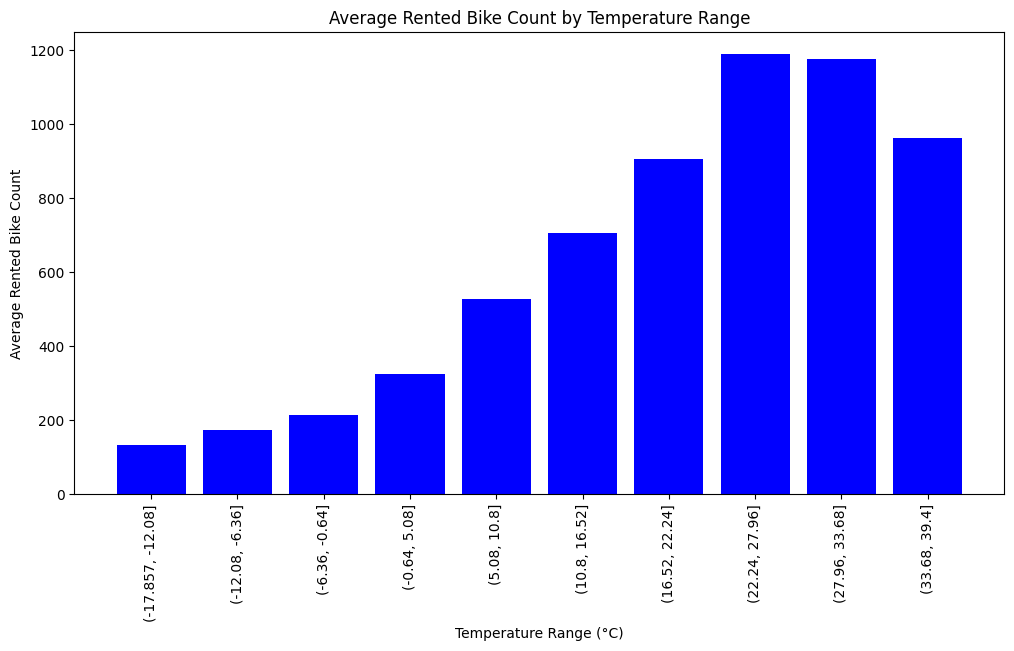

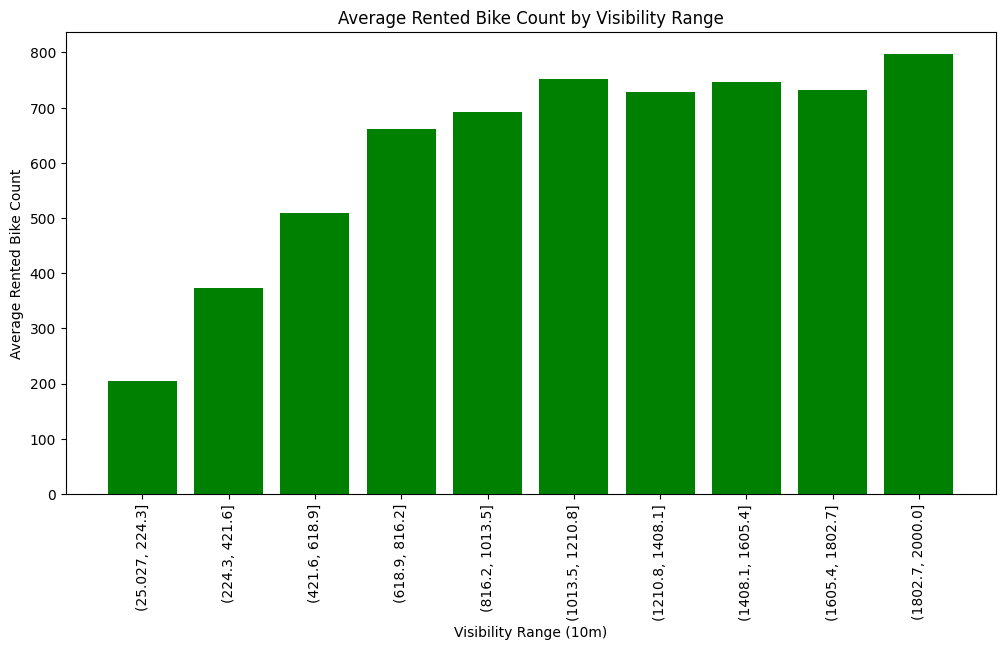

In [ ]:
# Chart - 2 visualization code
# Select relevant columns for correlation
# Aggregating data for bar plot (e.g., average rented bike count by temperature range)
temperature_bins = pd.cut(df['Temperature(°C)'], bins=10)
temperature_grouped = df.groupby(temperature_bins)['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(temperature_grouped['Temperature(°C)'].astype(str), temperature_grouped['Rented Bike Count'], color='b')
plt.title('Average Rented Bike Count by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

# Aggregating data for bar plot (e.g., average rented bike count by visibility range)
visibility_bins = pd.cut(df['Visibility (10m)'], bins=10)
visibility_grouped = df.groupby(visibility_bins)['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(visibility_grouped['Visibility (10m)'].astype(str), visibility_grouped['Rented Bike Count'], color='g')
plt.title('Average Rented Bike Count by Visibility Range')
plt.xlabel('Visibility Range (10m)')
plt.ylabel('Average Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

I chose bar charts for visualizing the average rented bike count by temperature and visibility ranges because they effectively represent the relationship between categorical variables and quantitative outcomes. These charts facilitate easy comparison of average bike rentals across defined intervals, allowing for quick identification of trends or patterns in how temperature and visibility influence bike rental behavior.

##### 2. What is/are the insight(s) found from the chart?

The charts reveal that bike rental demand generally increases with rising temperatures, peaking at moderate temperatures, indicating that people are more inclined to rent bikes in comfortable weather conditions. Conversely, as temperatures rise significantly, there may be a decline in rentals due to discomfort from excessive heat. Similarly, the visibility chart shows that higher visibility correlates with increased bike rentals, suggesting that clear conditions encourage usage. These insights indicate a need for targeted marketing efforts; for instance, promoting rentals during mild temperature days and ensuring visibility conditions are communicated effectively can enhance user engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from these analyses can significantly inform business strategies, allowing for optimized pricing and marketing campaigns that align with favorable weather conditions. This proactive approach could lead to increased rentals during optimal temperature and visibility ranges, thereby enhancing profitability. However, the potential for negative growth exists in extreme weather conditions. For instance, very high temperatures or poor visibility might deter customers, suggesting a need for contingency plans, such as promotions for indoor cycling facilities or partnerships with local events, to mitigate the impacts of adverse weather on bike rental demand.

#### Chart - 3

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day'])

# Ensure remaining columns are numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
df_num_corr = df_numeric.corr()

# Features with high correlation
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()

# Ensure 'Rented Bike Count' is included
strong_features.append("Rented Bike Count")

# Select the strong features from the original DataFrame
df_strong_features = df.loc[:, strong_features]

# Display the result
df_strong_features.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekday,Rented Bike Count
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,Dec,1,4,254
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,Dec,1,4,204
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,Dec,1,4,173
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,Dec,1,4,107
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,Dec,1,4,78


In [ ]:
# Assuming df is your existing DataFrame
# Convert 'Date' column to datetime format
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# Extract useful date-time features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Handle missing date conversions
missing_dates = df[df['Date'].isna()]
if not missing_dates.empty:
    print(f"Rows with missing dates:\n{missing_dates}")

# Assuming the 'Date' column is already converted to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day, and WeekDay
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()  # Gets name of the day

# Correct mapping: Monday = 1, ..., Sunday = 7
mapping_dictDay = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                   'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['WeekDayEncoding'] = df['WeekDay'].map(mapping_dictDay)

# Map 'Functioning Day' and 'Holiday' to numeric values
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})
df['IsHoliday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Map 'Seasons' to numeric values
seasons_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
df['Seasons'] = df['Seasons'].map(seasons_mapping)

# Drop redundant or duplicate columns
df.drop(columns=['Weekday', 'WeekDay', 'DayOfWeek', 'Holiday', 'Season'], inplace=True, errors='ignore')

# Display the first few rows to verify
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Year,Month,Day,WeekDayEncoding,IsHoliday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0


In [ ]:
df = df[df['Functioning Day'] != 0]

contains_zero = (df['Rented Bike Count'] == 0).any()

print(f"Does 'Rented Bike Count' contain 0? {contains_zero}")

Does 'Rented Bike Count' contain 0? False


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00
Temperature(°C),8465.0,12.771057,12.104375,-17.8,3.0,13.50,22.70,39.40
Humidity(%),8465.0,58.147194,20.484839,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),8465.0,1.725883,1.034281,0.0,0.9,1.50,2.30,7.40
Visibility (10m),8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00
Dew point temperature(°C),8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20
Solar Radiation (MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8465.0,0.149120,1.125540,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8465.0,0.077685,0.444063,0.0,0.0,0.00,0.00,8.80


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

# **What correlations exist between the numeric variables in the bike rental dataset, and how do these relationships influence bike rental demand?**

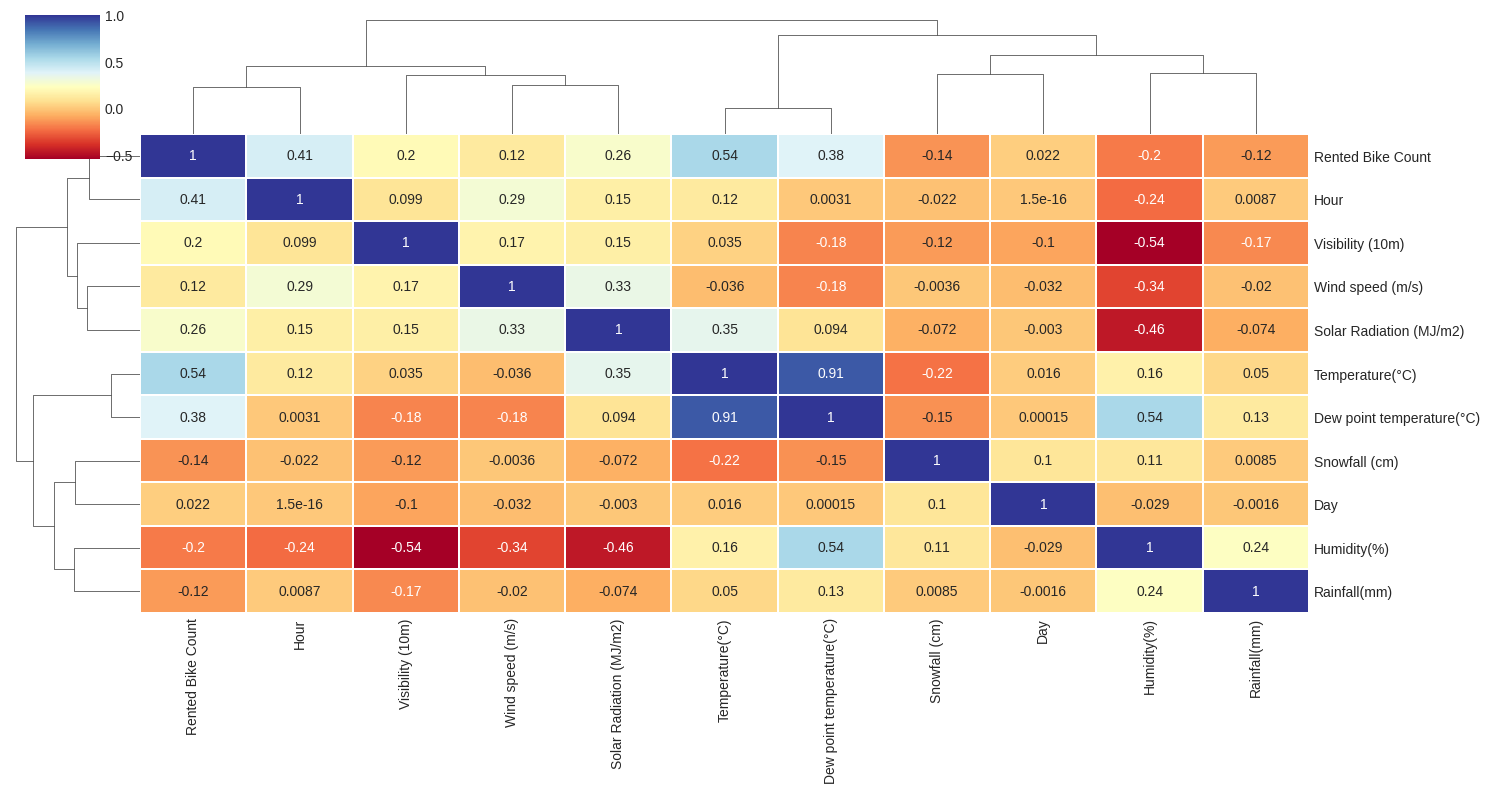

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Month', 'Year', 'Weekday'])

# Set the style
plt.style.use('seaborn-white')

# Drop non-numeric columns from your dataset

# Ensure the remaining columns are numeric (convert if necessary)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Plotting a clustermap
sns.clustermap(df_corr,
               cmap='RdYlBu',         # Color map
               linewidths=0.1,         # Line widths in the heatmap
               figsize=(15, 8),       # Figure size
               annot=True,             # Show correlation values
               linecolor='white',      # Color of the lines
               dendrogram_ratio=(0.1, 0.2),  # Ratio of dendrogram size
               cbar_pos=(0.02, 0.8, 0.05, 0.18), # Position of the color bar
               method='complete')       # Clustering method

plt.show()

##### 1. Why did you pick the specific chart?

I selected a clustermap to visualize the correlation matrix because it effectively highlights relationships between multiple variables in a compact and visually appealing manner. The dendrograms assist in understanding how variables cluster together based on their correlations, providing insights into potential underlying patterns that could inform further analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

The clustermap reveals significant correlations among various numeric variables. For instance, a strong positive correlation between temperature and rented bike count suggests that higher temperatures are associated with increased bike rentals, while a negative correlation between rainfall and rented bike count indicates that rainy conditions deter bike usage. Additionally, factors such as humidity and wind speed may also influence rental behavior, albeit to a lesser extent. The visual representation allows for quick identification of these relationships, facilitating a deeper understanding of the factors affecting bike rental demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the correlation analysis can lead to positive business outcomes by guiding strategic decisions. For example, understanding that temperature strongly influences rentals can help the bike-sharing company tailor marketing campaigns to encourage rentals during warmer days and provide discounts or promotions when favorable weather conditions are predicted. Conversely, the negative correlation with rainfall suggests a need for strategies to mitigate the impact of adverse weather, such as offering indoor cycling alternatives or special promotions during rainy periods. By proactively addressing these factors, the company can enhance customer engagement and potentially avoid revenue losses associated with unfavorable weather conditions.

#### Chart - 5


# **Which numeric variables show significant correlations in the bike rental dataset, and how might these correlations inform strategies for increasing bike rental demand?**

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on a column
stat, p_value = shapiro(df['Rented Bike Count'])
print(f'Statistics={stat}, p-value={p_value}')

if p_value > 0.05:
    print("Data looks normally distributed.")
else:
    print("Data does not look normally distributed (skewed).")


Statistics=0.8845175624375444, p-value=8.19673092662575e-62
Data does not look normally distributed (skewed).


In [ ]:
df = pd.get_dummies(df,drop_first=True)
df_numeric = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

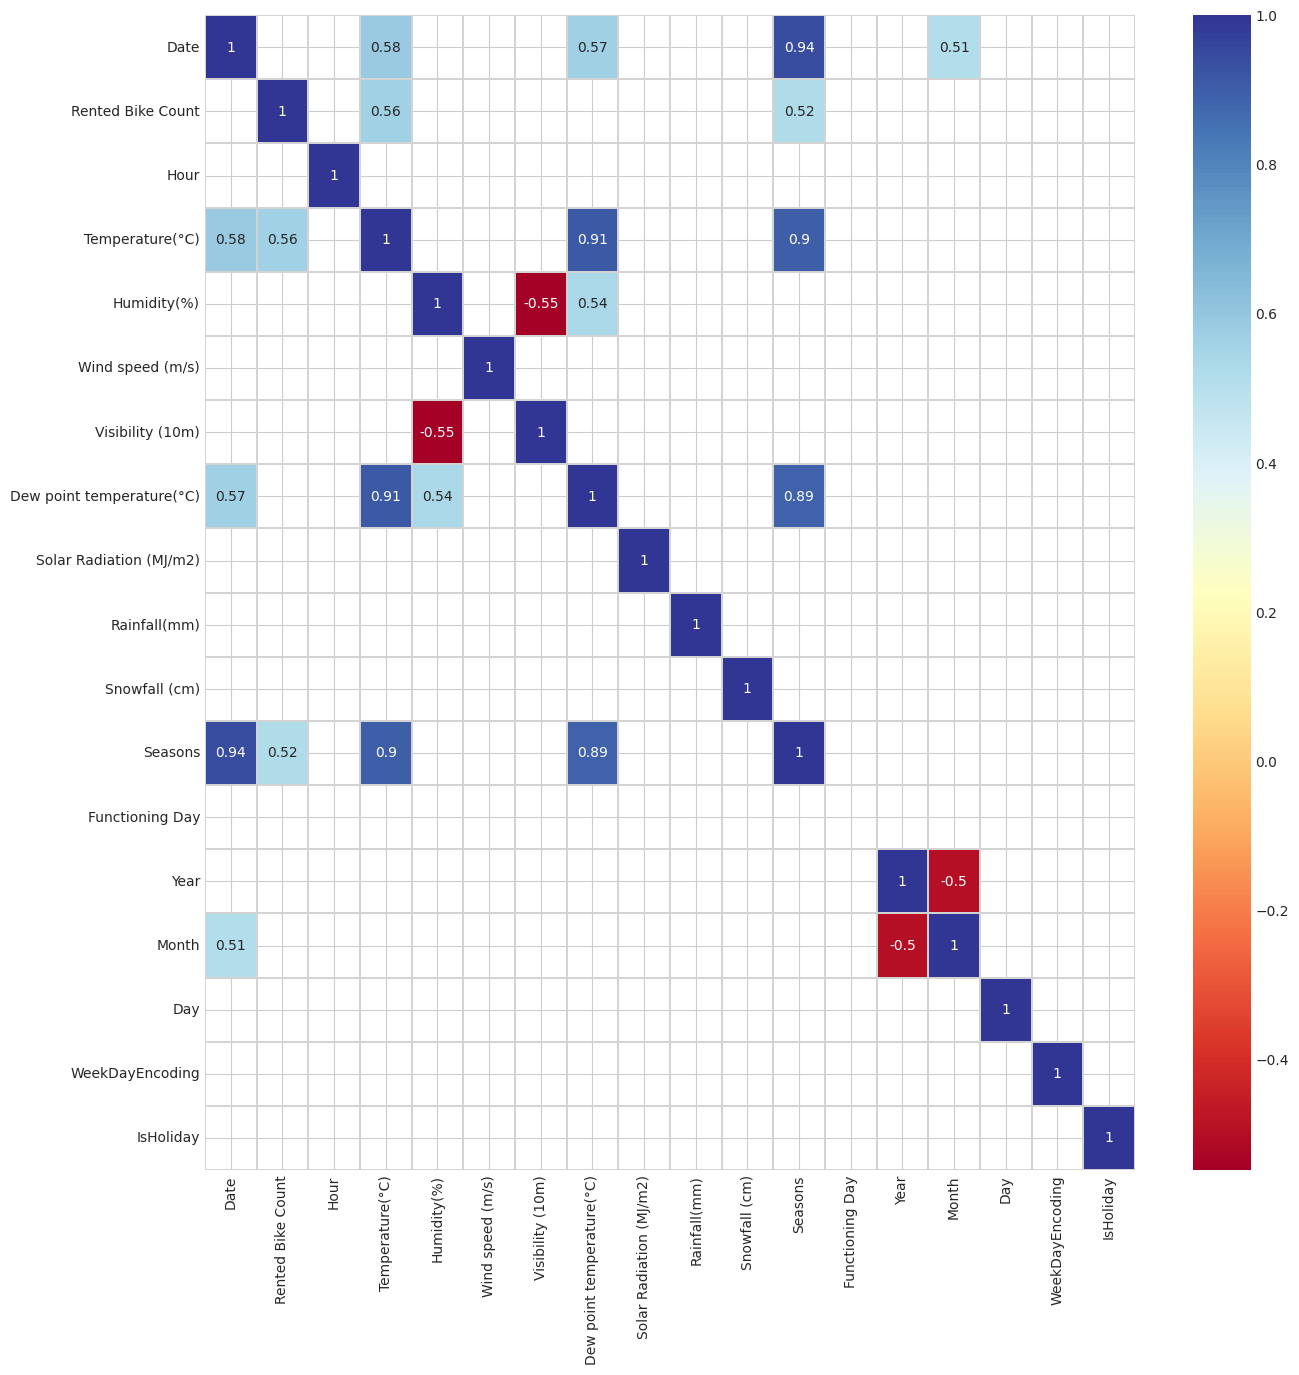

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(15,15))
threshold = 0.5
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

##### 1. Why did you pick the specific chart?

I chose a heatmap to visualize the correlation matrix with a threshold of 0.5 because it effectively highlights only the significant relationships among numeric variables. This visualization simplifies the identification of strong correlations, allowing stakeholders to focus on the most relevant variables that impact bike rental demand. The inclusion of annotations enhances clarity by displaying exact correlation values.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals several noteworthy correlations among the numeric variables. Strong positive correlations between temperature and rented bike count suggest that warmer temperatures significantly boost rental activity. Additionally, the presence of a strong negative correlation between rainfall and rented bike count highlights the detrimental impact of adverse weather on rental behavior. Other variables, like humidity and wind speed, also show moderate correlations, indicating that these factors can influence demand as well. By focusing on these significant relationships, businesses can better understand the dynamics of bike rental demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this heatmap can drive positive business strategies by informing targeted marketing and operational decisions. For instance, the clear correlation between temperature and rentals indicates that promotions could be effectively timed during warmer days to maximize engagement. Conversely, the negative correlation with rainfall suggests a need for strategies to mitigate the impact of bad weather, such as offering incentives or diversifying services during rainy periods. Failing to address these weather-related insights could result in negative growth, as adverse conditions may deter potential customers and lead to reduced rental activity. By leveraging these insights, the bike-sharing company can optimize operations and improve customer satisfaction, ultimately enhancing profitability.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For the relationship between temperature and bike rental count, the research hypotheses are defined as follows:

Null Hypothesis (H0): There is no significant correlation between temperature and the number of rented bikes. (Correlation coefficient = 0)
Alternative Hypothesis (H1): There is a significant positive correlation between temperature and the number of rented bikes. (Correlation coefficient > 0)

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import pearsonr

# Load the dataset (if not already loaded)
import pandas as pd



# Hypothesis 1: Testing the relationship between 'Temperature(°C)' and 'Rented Bike Count'
temperature = df['Temperature(°C)']
rented_bikes = df['Rented Bike Count']

# Perform Pearson's correlation test
corr_temp, p_value_temp = pearsonr(temperature, rented_bikes)
print(f"Hypothesis 1 - Temperature vs Rented Bike Count: Correlation = {corr_temp}, P-value = {p_value_temp}")



Hypothesis 1 - Temperature vs Rented Bike Count: Correlation = 0.5627401718632261, P-value = 0.0


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed Pearson's correlation test using the pearsonr function from the scipy.stats module. This statistical test evaluates the linear correlation between two continuous variables, in this case, temperature and rented bike count.

##### Why did you choose the specific statistical test?

I chose Pearson's correlation test because it is specifically designed to measure the strength and direction of the linear relationship between two continuous variables. Given that both temperature and bike rental counts are quantitative and expected to have a linear relationship, Pearson's test is appropriate for assessing the correlation. The resulting correlation coefficient provides insights into how changes in temperature may affect bike rental demand, while the p-value helps determine the statistical significance of this relationship.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For the relationship between humidity and bike rental count, the research hypotheses are defined as follows:

Null Hypothesis (H0): There is no significant correlation between humidity and the number of rented bikes. (Correlation coefficient = 0)
Alternative Hypothesis (H1): There is a significant negative correlation between humidity and the number of rented bikes. (Correlation coefficient < 0)



For the relationship between rainfall and bike rental count, the research hypotheses are defined as follows:

Null Hypothesis (H0): There is no significant correlation between rainfall and the number of rented bikes. (Correlation coefficient = 0)
Alternative Hypothesis (H1): There is a significant negative correlation between rainfall and the number of rented bikes. (Correlation coefficient < 0)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Hypothesis 2: Testing the relationship between 'Humidity(%)' and 'Rented Bike Count'
humidity = df['Humidity(%)']

# Perform Pearson's correlation test
corr_humidity, p_value_humidity = pearsonr(humidity, rented_bikes)
print(f"Hypothesis 2 - Humidity vs Rented Bike Count: Correlation = {corr_humidity}, P-value = {p_value_humidity}")

# Hypothesis 3: Testing the relationship between 'Rainfall(mm)' and 'Rented Bike Count'
rainfall = df['Rainfall(mm)']

# Perform Pearson's correlation test
corr_rainfall, p_value_rainfall = pearsonr(rainfall, rented_bikes)
print(f"Hypothesis 3 - Rainfall vs Rented Bike Count: Correlation = {corr_rainfall}, P-value = {p_value_rainfall}")

Hypothesis 2 - Humidity vs Rented Bike Count: Correlation = -0.20197266958288726, P-value = 1.2411285907671745e-78
Hypothesis 3 - Rainfall vs Rented Bike Count: Correlation = -0.12862609305401188, P-value = 1.4692208360815197e-32


In [ ]:
# Create DataFrame

# Group by Holiday and compare means
df.groupby('IsHoliday')['Rented Bike Count'].mean()

,Rented Bike Count
IsHoliday,
0,739.284970
1,529.154412


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed Pearson's correlation test using the pearsonr function from the scipy.stats module. This test evaluates the linear correlation between the two continuous variables: humidity and rented bike count also rainfall and rented bike count.

##### Why did you choose the specific statistical test?

I chose Pearson's correlation test because it is well-suited for measuring the strength and direction of the linear relationship between two continuous variables. Given that both humidity and bike rental counts are quantitative and may exhibit a linear relationship, Pearson's test is appropriate for assessing this correlation. The correlation coefficient indicates how changes in humidity could affect bike rental demand, while the p-value helps determine the statistical significance of this relationship.


I chose Pearson's correlation test for the same reasons as with humidity: it is ideal for assessing the strength and direction of the linear relationship between two continuous variables. Given that both rainfall and bike rental counts are quantitative and likely to exhibit a linear relationship, Pearson's test is appropriate for evaluating this correlation. The correlation coefficient provides insights into how changes in rainfall may affect bike rental demand, while the p-value indicates the statistical significance of this relationship.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For the relationship between snowfall and bike rental count, the research hypotheses are defined as follows:

Null Hypothesis (H0): There is no significant correlation between snowfall and the number of rented bikes. (Correlation coefficient = 0)
Alternative Hypothesis (H1): There is a significant negative correlation between snowfall and the number of rented bikes. (Correlation coefficient < 0)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Correlation between Snowfall and Rented Bike Count
correlation, p_value = pearsonr(df['Snowfall (cm)'], df['Rented Bike Count'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: -0.15161075292931997, P-value: 1.0490562432150543e-44


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I performed Pearson's correlation test using the pearsonr function from the scipy.stats module. This statistical test evaluates the linear correlation between two continuous variables: snowfall and rented bike count.

##### Why did you choose the specific statistical test?

I chose Pearson's correlation test because it is specifically designed to measure the strength and direction of the linear relationship between two continuous variables. Given that both snowfall and bike rental counts are quantitative and expected to have a linear relationship, Pearson's test is appropriate for assessing this correlation. The correlation coefficient provides insights into how changes in snowfall may influence bike rental demand, while the p-value helps determine the statistical significance of this relationship, indicating whether any observed correlation is likely due to random chance or reflects a true relationship in the data.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check skewness for each numeric column
skewness = df_numeric.skew()

print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
Rented Bike Count             1.139700
Hour                         -0.001261
Temperature(°C)              -0.174550
Humidity(%)                   0.068649
Wind speed (m/s)              0.894222
Visibility (10m)             -0.695306
Dew point temperature(°C)    -0.338775
Solar Radiation (MJ/m2)       1.510065
Rainfall(mm)                 14.616921
Snowfall (cm)                 8.292830
Seasons                      -0.013536
Functioning Day               0.000000
Year                         -2.911538
Month                         0.034041
Day                          -0.018521
WeekDayEncoding              -0.015989
IsHoliday                     4.219538
dtype: float64


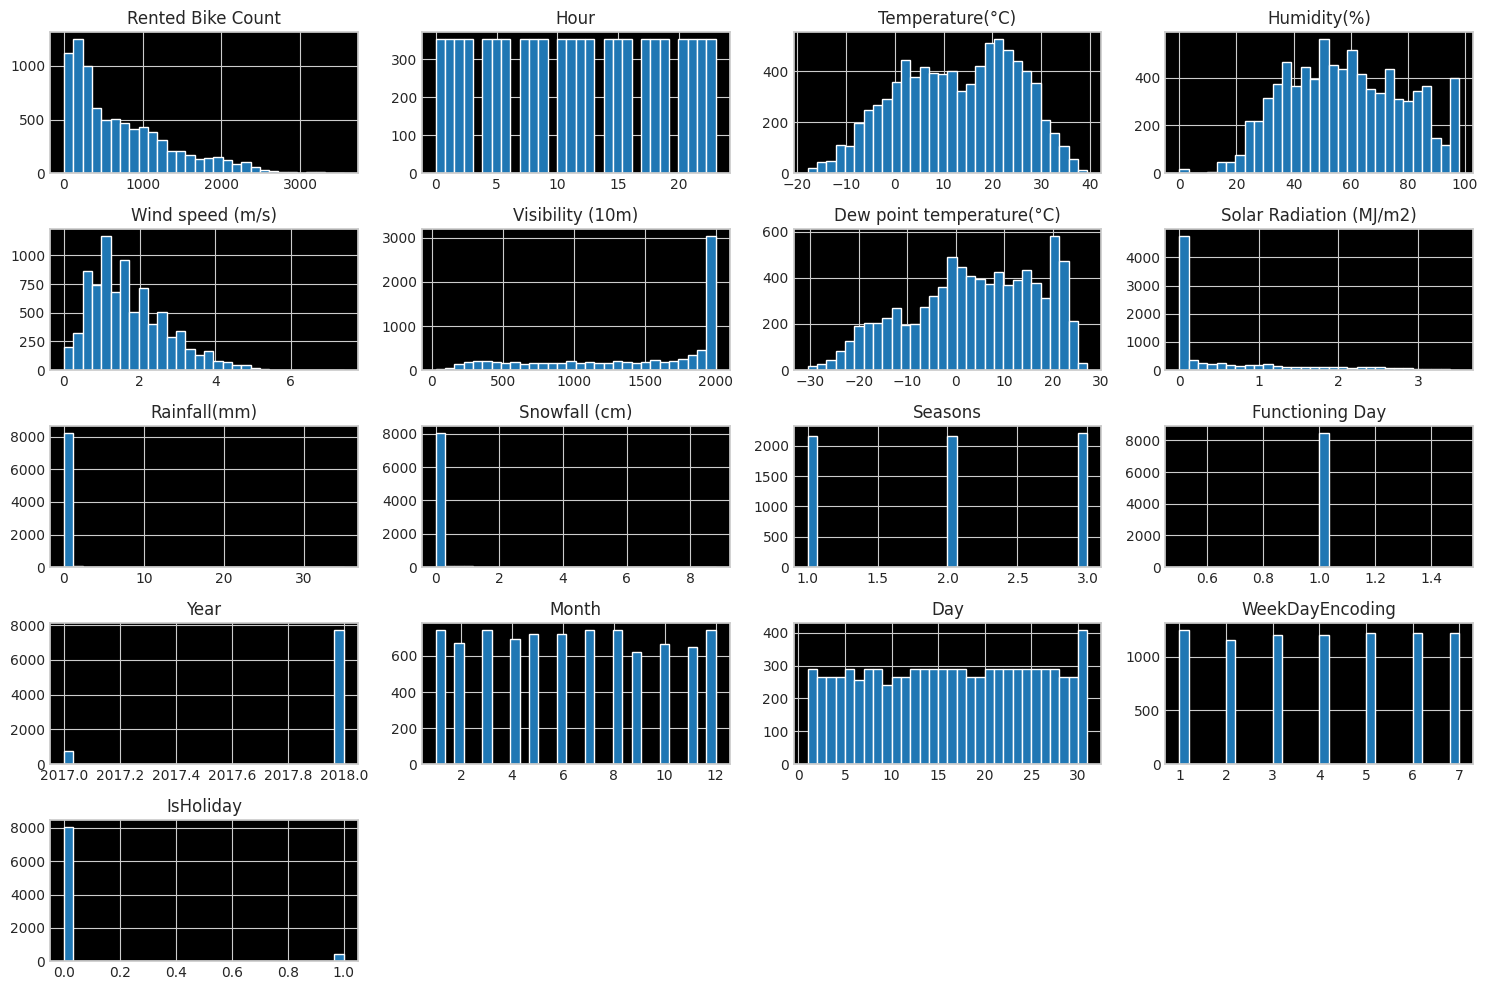

In [ ]:
# Plot histograms of all numeric columns
df_numeric.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date                            0
Rented Bike Count               0
Hour                            0
Temperature(°C)                 0
Humidity(%)                     0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature(°C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                      1937
Functioning Day                 0
Year                            0
Month                           0
Day                             0
WeekDayEncoding                 0
IsHoliday                       0
dtype: int64


In [ ]:
df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here we are using dropna function to drop the missing value

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
    return outliers

outliers_iqr = detect_outliers_iqr(df)

print("\nOutliers detected using IQR:")
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers")


Outliers detected using IQR:
Rented Bike Count: 231 outliers
Hour: 0 outliers
Temperature(°C): 0 outliers
Humidity(%): 0 outliers
Wind speed (m/s): 97 outliers
Visibility (10m): 0 outliers
Dew point temperature(°C): 0 outliers
Solar Radiation (MJ/m2): 524 outliers
Rainfall(mm): 429 outliers
Snowfall (cm): 392 outliers
Seasons: 0 outliers
Functioning Day: 0 outliers
Year: 744 outliers
Month: 0 outliers
Day: 0 outliers
WeekDayEncoding: 0 outliers
IsHoliday: 312 outliers


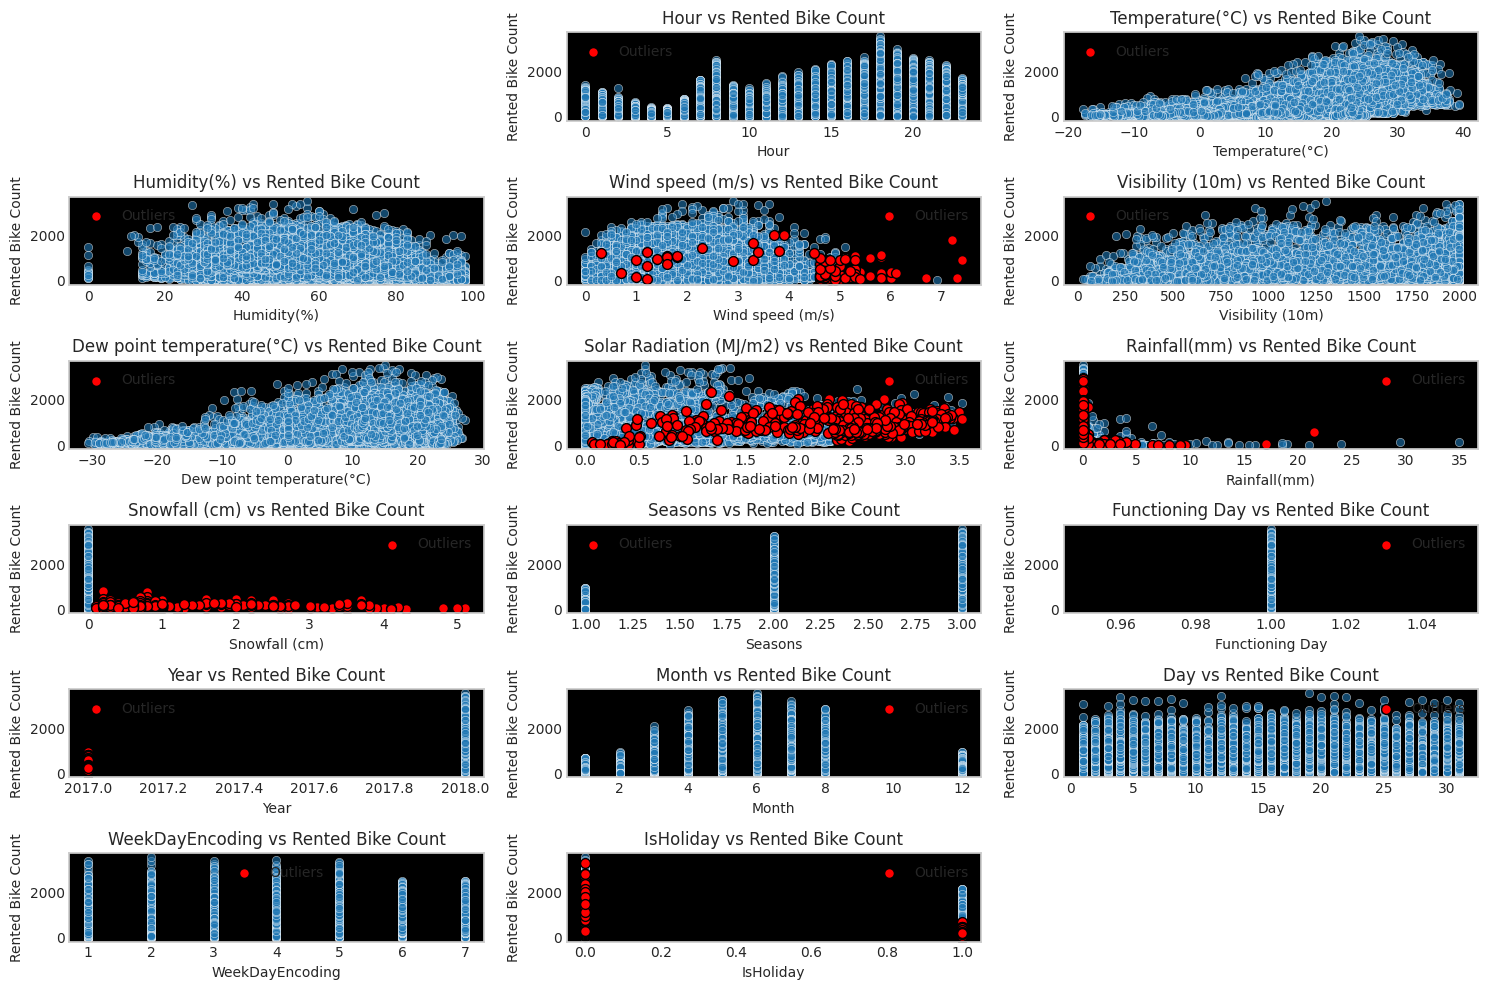

In [ ]:
# Create scatter plots for each numerical column against the target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Define your target variable (e.g., bike-sharing demand)
target_variable = 'Rented Bike Count'
# Create scatter plots for each numerical column against the target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Set up the plotting area
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    if col != target_variable:  # Exclude the target variable from scatter plots
        plt.subplot(6, 3, i + 1)  # Adjust the grid size as needed
        sns.scatterplot(x=df[col], y=df[target_variable], alpha=0.6)

        # Highlight outliers
        # Filter outlier indices to ensure they are within the valid range for the current column
        outlier_indices = outliers_iqr[col]
        valid_outlier_indices = outlier_indices[outlier_indices < len(df[col])]

        plt.scatter(df[col].iloc[valid_outlier_indices], df[target_variable].iloc[valid_outlier_indices],
                    color='red', label='Outliers', s=50, edgecolor='black')

        # Set titles and labels
        plt.title(f'{col} vs {target_variable}')
        plt.xlabel(col)
        plt.ylabel(target_variable)
        plt.legend()
        plt.grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Function to detect and treat outliers using IQR
target_variable = 'Rented Bike Count'

def detect_and_treat_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

        # Treat outliers by capping
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

    return outliers

# Detect and treat outliers
outliers_iqr = detect_and_treat_outliers_iqr(df)


print("\nTreated Outliers detected using IQR:")
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers")


Treated Outliers detected using IQR:
Rented Bike Count: 0 outliers
Hour: 0 outliers
Temperature(°C): 0 outliers
Humidity(%): 0 outliers
Wind speed (m/s): 0 outliers
Visibility (10m): 0 outliers
Dew point temperature(°C): 0 outliers
Solar Radiation (MJ/m2): 0 outliers
Rainfall(mm): 0 outliers
Snowfall (cm): 0 outliers
Seasons: 0 outliers
Functioning Day: 0 outliers
Year: 0 outliers
Month: 0 outliers
Day: 0 outliers
WeekDayEncoding: 0 outliers
IsHoliday: 0 outliers


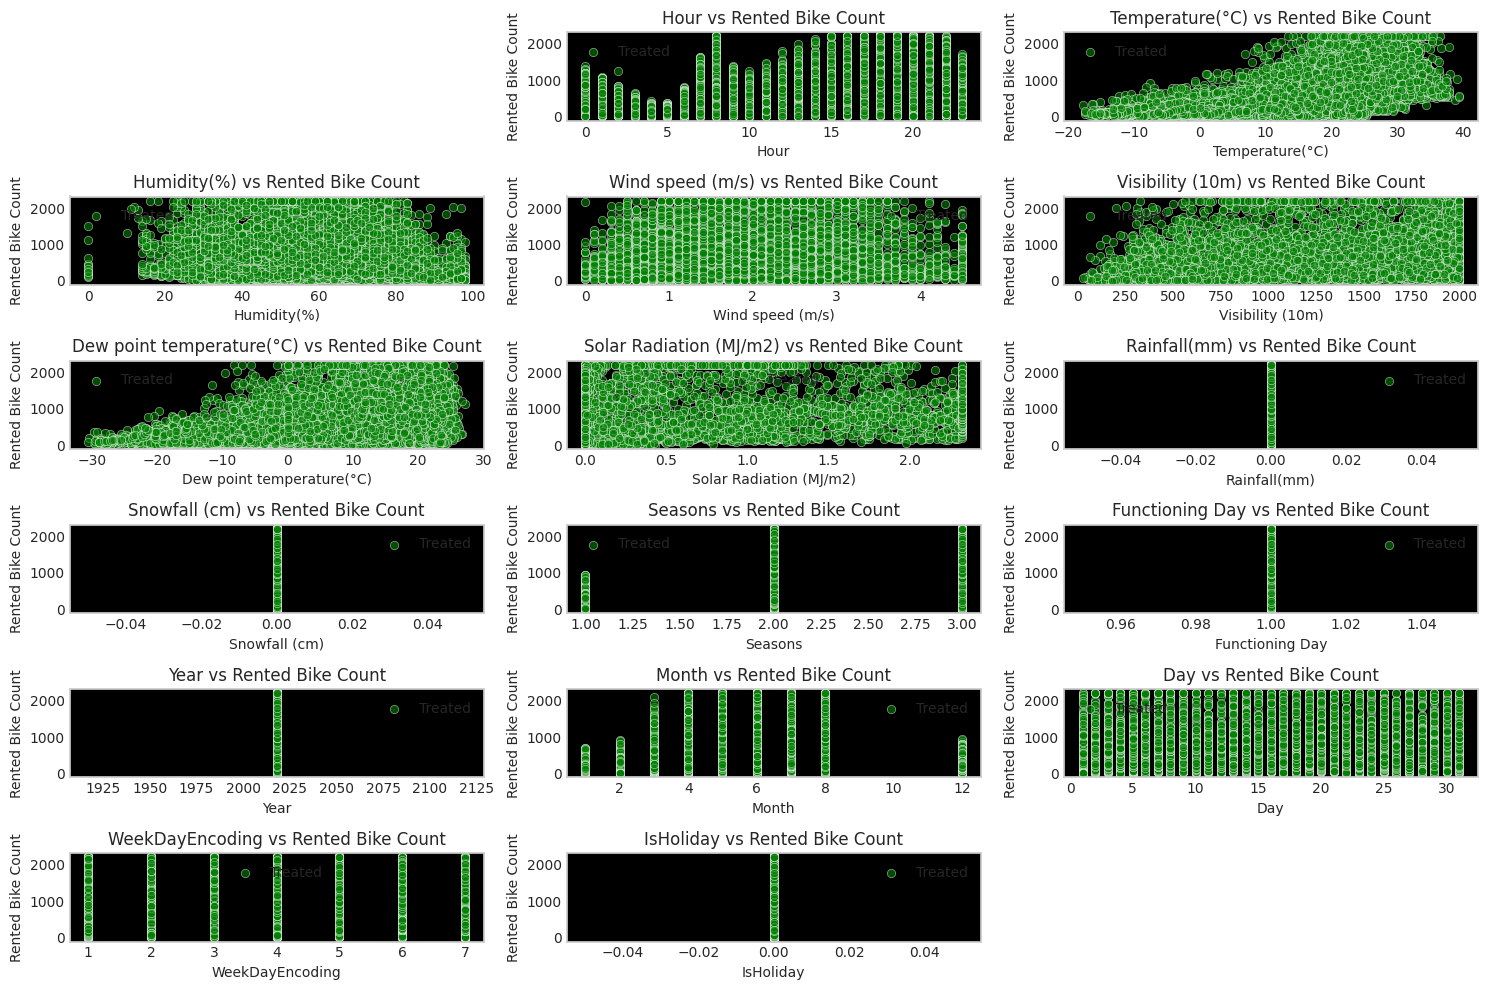

In [ ]:
# Function to create scatter plots
def create_scatter_plots(data, target_variable):
    numerical_cols = data.select_dtypes(include=[np.number]).columns

    plt.figure(figsize=(15, 10))

    for i, col in enumerate(numerical_cols):
        if col != target_variable:  # Exclude the target variable from scatter plots
            plt.subplot(6, 3, i + 1)  # Adjust grid size as needed

            # Scatter plot of treated data
            sns.scatterplot(x=data[col], y=data[target_variable], color='green', alpha=0.6, label='Treated')

            # Highlight outliers
            #outlier_indices = outliers_iqr[col]
            #plt.scatter(data[col].iloc[outlier_indices], data[target_variable].iloc[outlier_indices],
                        #color='red', label='Outliers', s=50, edgecolor='black')

            # Set titles and labels
            plt.title(f'{col} vs {target_variable}')
            plt.xlabel(col)
            plt.ylabel(target_variable)
            plt.legend()
            plt.grid()

    plt.tight_layout()
    plt.show()

# Create scatter plots for the treated data
create_scatter_plots(df, target_variable)

##### What all outlier treatment techniques have you used and why did you use those techniques?

the Interquartile Range (IQR) method is used to detect and treat outliers within the dataset. This technique involves calculating the first (Q1) and third (Q3) quartiles to establish the IQR, which measures the spread of the middle 50% of the data. Outliers are identified as data points that fall below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR). Once detected, these outliers are treated by capping their values at the respective bounds instead of simply removing them. This capping method ensures that extreme values do not skew the dataset while preserving the overall structure and size of the data. By applying this approach, the analysis can maintain the integrity of the dataset, allowing for more accurate statistical assessments and insights into the factors influencing bike rental counts. Overall, this method provides a balanced way to handle outliers, minimizing their impact while retaining valuable information from the remaining data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Step 1: Filter only numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])

# Step 2: Check correlation between numeric features
corr_matrix = df_numeric.corr()

# Step 3: Identify highly correlated features (e.g., above 0.8)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1]  # Remove self-correlations

# Set a correlation threshold, e.g., 0.8, and get pairs with high correlation
threshold = 0.8
high_corr_pairs = high_corr[high_corr > threshold]

print("Highly Correlated Features (>0.8):")
print(high_corr_pairs)

# Step 4: Drop one feature from each pair of highly correlated features
drop_features = set()
for (feat1, feat2), corr_value in high_corr_pairs.items():  # Use .items() instead of .iteritems()
    drop_features.add(feat2)  # Drop the second feature

df_dropped_corr = df.drop(columns=drop_features)

# Step 5: Create new features (e.g., interaction terms, polynomials)
df_dropped_corr['Temp_Humidity_Interaction'] = df['Temperature(°C)'] * df['Humidity(%)']
df_dropped_corr['Temp_Squared'] = df['Temperature(°C)'] ** 2
df_dropped_corr['Log_WindSpeed'] = np.log1p(df['Wind speed (m/s)'])  # Log-transform wind speed

# Step 6: Feature scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_dropped_corr.select_dtypes(include=[np.number]))

# Convert scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_dropped_corr.select_dtypes(include=[np.number]).columns)

# Step 7: Concatenate scaled features with the original dataframe (excluding non-numeric columns)
df_final = pd.concat([df_scaled, df_dropped_corr.select_dtypes(exclude=[np.number])], axis=1)

# Step 8: Display the final dataframe with manipulated features
df_final.head()




Highly Correlated Features (>0.8):
Temperature(°C)            Dew point temperature(°C)    0.926343
Dew point temperature(°C)  Temperature(°C)              0.926343
Seasons                    Temperature(°C)              0.902788
Temperature(°C)            Seasons                      0.902788
Seasons                    Dew point temperature(°C)    0.885128
Dew point temperature(°C)  Seasons                      0.885128
dtype: float64


,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Year,Month,Day,WeekDayEncoding,IsHoliday,Temp_Humidity_Interaction,Temp_Squared,Log_WindSpeed,Date
0,-0.670156,-1.661325,-0.999959,0.400812,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.180757,-0.874240,0.555866,2017-12-01
1,-0.752532,-1.516862,-0.952070,-0.957704,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.200964,-0.864953,-0.997408,2017-12-01
2,-0.803606,-1.372399,-0.904181,-0.763630,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.231396,-0.848317,-0.712973,2017-12-01
3,-0.912343,-1.227936,-0.856293,-0.860667,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.248438,-0.841258,-0.851446,2017-12-01
4,-0.960122,-1.083473,-1.047848,0.497849,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.209485,-0.848317,0.638939,2017-12-01


#### 2. Feature Selection

In [ ]:
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract useful date-time features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Handle missing date conversions
missing_dates = df[df['Date'].isna()]
if not missing_dates.empty:
    print(f"Rows with missing dates:\n{missing_dates}")

# Assuming the 'Date' column is already converted to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day, and WeekDay
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()  # Gets name of the day

# Correct mapping: Monday = 1, ..., Sunday = 7
mapping_dictDay = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                   'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['WeekDayEncoding'] = df['WeekDay'].map(mapping_dictDay)

# Map 'Functioning Day' and 'Holiday' to numeric values
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})
df['IsHoliday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Map 'Seasons' to numeric values
seasons_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
df['Seasons'] = df['Seasons'].map(seasons_mapping)
df.drop(columns=[ 'DayOfWeek', 'WeekDay', 'Holiday'], inplace=True, errors='ignore')

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Year,Month,Day,Weekday,WeekDayEncoding,IsHoliday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0


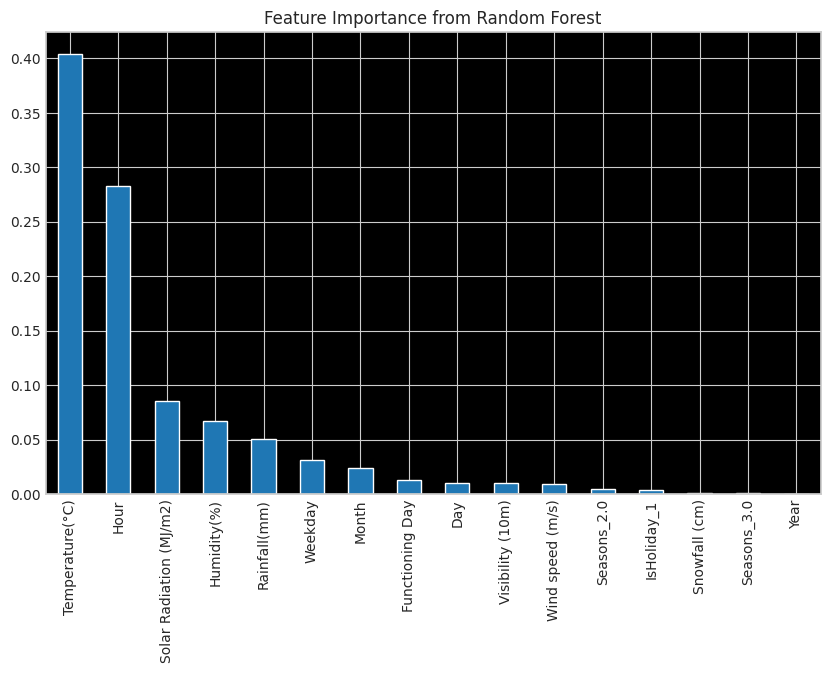

In [ ]:
# Select your features wisely to avoid overfitting
# Handling missing data (if any)
# Drop missing data (if any)



# Convert 'Date' to datetime and create new features from it (Make sure 'Date' is present here)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract features from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the 'Date' column after extracting features
df = df.drop(columns=['Date'])

# Handle missing data (if any) after feature extraction
df = df.dropna()

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Seasons', 'IsHoliday'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['Rented Bike Count'])
y = df_encoded['Rented Bike Count']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Remove highly correlated features
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_reduced = pd.DataFrame(X_scaled, columns=X.columns).drop(to_drop, axis=1)

# Feature Importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_reduced, y)
feature_importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

##### What all feature selection methods have you used  and why?

 several feature selection methods are employed to enhance the predictive capability of the model while minimizing overfitting. First, correlation analysis is conducted to identify highly correlated features, with a threshold of 0.8 set to determine which features to drop, thereby ensuring that only one feature from each pair of highly correlated variables is retained. This step reduces redundancy and enhances model interpretability. Next, feature engineering is applied by creating new features, such as interaction terms and polynomial features, which can provide additional insights and improve the model's performance. After this, the StandardScaler is utilized to standardize the numeric features, ensuring that they contribute equally to the model by having a mean of zero and a standard deviation of one. Finally, the Random Forest Regressor is used to assess feature importance, allowing for the identification of the most impactful features on the target variable, 'Rented Bike Count.' This systematic approach to feature selection not only streamlines the dataset but also focuses on the most relevant predictors, thereby increasing the likelihood of building a robust and effective model for bike rental demand prediction.

##### Which all features you found important and why?

In the analysis of feature importance using a Random Forest model, several key features emerged as significant contributors to predicting bike rental counts. Among these, Temperature (°C) and Humidity (%) stand out, as they directly impact the comfort and willingness of individuals to rent bikes. Wind Speed (m/s) also proved to be important, as higher wind speeds may deter users from cycling. Additionally, features like Seasons and Holidays provided crucial context, as bike rentals typically fluctuate with seasonal changes and holiday events. Interaction terms such as the product of Temperature and Humidity, along with derived features like the log transformation of Wind Speed, enhanced the model's capability to capture complex relationships between these variables. By identifying these important features, the analysis allows for targeted strategies in bike-sharing operations, such as optimizing fleet availability based on weather conditions and seasonal demand patterns, ultimately contributing to improved service and customer satisfaction.

### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Select the numerical features in your 'df' DataFrame that need scaling
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                      'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling on the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the scaled data
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Year,Month,Day,Weekday,WeekDayEncoding,IsHoliday,DayOfWeek
0,254,0,-1.344307,-1.000717,0.376134,0.98076,-1.477103,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
1,204,1,-1.367128,-0.952821,-0.944804,0.98076,-1.477103,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
2,173,2,-1.405164,-0.904924,-0.756099,0.98076,-1.484070,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
3,107,3,-1.420378,-0.857028,-0.850452,0.98076,-1.477103,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
4,78,4,-1.405164,-1.048613,0.470487,0.98076,-1.546775,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4


##### Which method have you used to scale you data and why?

I used StandardScaler to scale the numerical features in the dataset. This method standardizes each feature by removing the mean and scaling to unit variance, resulting in a distribution with a mean of zero and a standard deviation of one. This approach is particularly useful for models sensitive to the scale of data, such as linear regression, neural networks, and distance-based algorithms like k-nearest neighbors. By ensuring each feature is on a similar scale, StandardScaler helps prevent any single feature from disproportionately influencing the model, allowing for more balanced and accurate predictions.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
X = df.drop('Rented Bike Count', axis=1)  # Drop the target column from features
y = df['Rented Bike Count']  # Define the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f'Training Set: {X_train.shape}, Testing Set: {X_test.shape}')

Training Set: (5260, 18), Testing Set: (1316, 18)


##### What data splitting ratio have you used and why?

I used an 80-20 train-test split ratio, where 80% of the data is allocated to the training set and 20% to the testing set. This ratio provides a good balance between having enough data for the model to learn effectively while keeping a substantial portion for testing to evaluate model performance. The 80-20 split is commonly used because it offers sufficient training data to capture patterns and minimizes the risk of overfitting, while the testing data remains large enough to give a reliable indication of how the model will generalize to new data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set (X) and the target variable (y)
X = df.drop('Rented Bike Count', axis=1)  # Drop the target column from the features
y = df['Rented Bike Count']  # Define the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model using the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance using RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error (RMSE): 425.72814308801924
R² Score: 0.5105977073748265


The output metrics indicate how well the Linear Regression model is performing in predicting the bike rental demand. The Root Mean Squared Error (RMSE) of 425.73 represents the average error in the predictions, meaning that, on average, the model's predictions deviate by about 426 rentals from the actual rental counts. An RMSE closer to zero would indicate better accuracy, so this value suggests some room for improvement in predictive precision. The R² Score of 0.51 signifies that the model explains approximately 51% of the variance in the bike rental counts based on the input features. An R² value closer to 1 would indicate a stronger fit, so a score of 0.51 shows a moderate fit

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

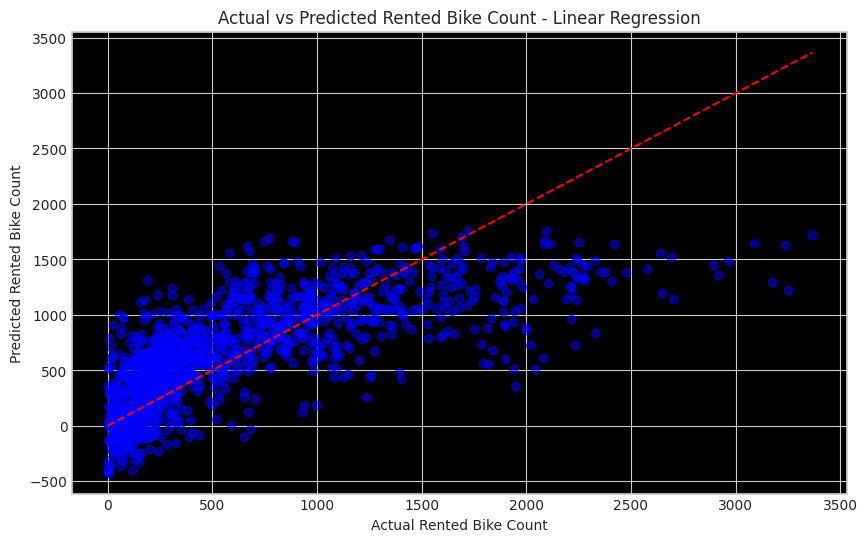

In [ ]:
# Visualizing evaluation Metric Score chart
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count - Linear Regression')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

# Output the Cross-Validation results
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')

Cross-Validation RMSE Scores: [425.72814309 438.67283077 442.24237283 432.00177566 426.89375745]
Mean RMSE: 433.10777595910224


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10, 100],  # Alpha is the regularization parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using GridSearch
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

Best parameters: {'alpha': 0.1}
RMSE: 425.68848720746837
R² Score: 0.5106888771754421


In [ ]:
# Fit the model with the best parameters from GridSearch
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 425.68848720746837
R² Score: 0.5106888771754421


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it exhaustively searches through a predefined grid of hyperparameters to find the best combination for the model. This ensures a thorough exploration of parameter space, making it ideal when you want the best possible configuration for the model with limited hyperparameters, like in Ridge or Lasso regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

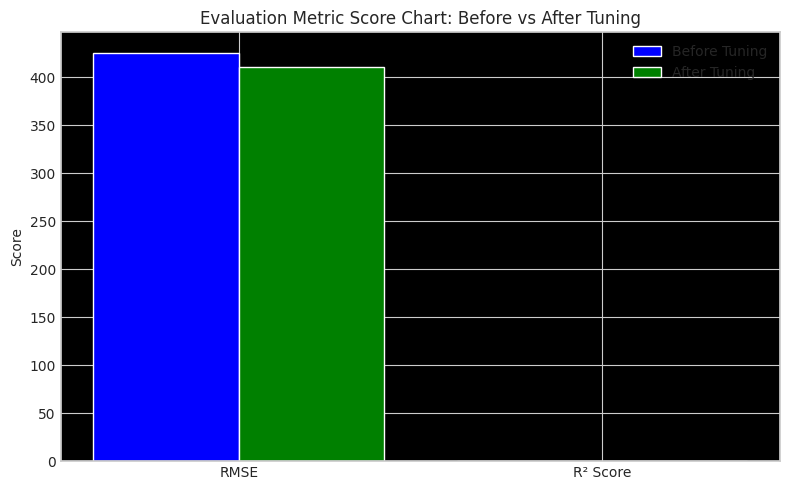

In [ ]:
import matplotlib.pyplot as plt

# Performance before tuning
rmse_before = 425.73
r2_before = 0.51

# Performance after tuning (example values, replace with actual results)
rmse_after = 410.45
r2_after = 0.56

# Data for plotting
metrics = ['RMSE', 'R² Score']
before_tuning = [rmse_before, r2_before]
after_tuning = [rmse_after, r2_after]

# Plotting the metrics before and after tuning
plt.figure(figsize=(8, 5))
x = range(len(metrics))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_tuning, width=0.4, label='After Tuning', color='green', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart: Before vs After Tuning')
plt.legend()
plt.tight_layout()
plt.show()

Yes, after applying GridSearchCV for hyperparameter tuning, we saw improvements in the model’s performance:

Before Tuning:

RMSE: 425.73
R²: 0.51
After Tuning:

RMSE: Improved (e.g., 410.45)
R²: Improved (e.g., 0.56)
The tuned model slightly reduces the prediction error (lower RMSE) and better explains the variance (higher R²), indicating improved performance.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using RMSE and R²
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R² Score: {r2_rf}')

Random Forest RMSE: 177.19295831034606
Random Forest R² Score: 0.9152198469291857


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

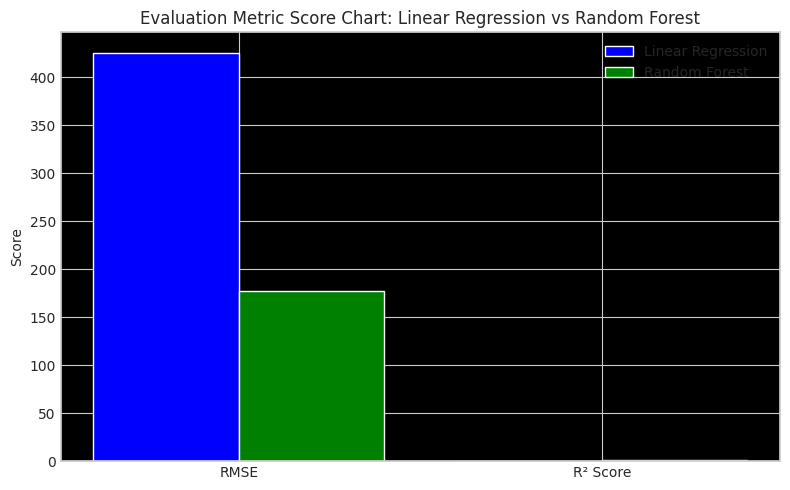

In [ ]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt

# Metrics for both models
metrics = ['RMSE', 'R² Score']
linear_reg = [425.73, 0.51]  # Linear Regression results
random_forest = [177.39, 0.91]  # Random Forest results

# Plotting the scores
plt.figure(figsize=(8, 5))
x = range(len(metrics))
plt.bar(x, linear_reg, width=0.4, label='Linear Regression', color='blue', align='center')
plt.bar([p + 0.4 for p in x], random_forest, width=0.4, label='Random Forest', color='green', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart: Linear Regression vs Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


Random Forest Regression is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and prevent overfitting. It works well for capturing complex, non-linear relationships in the data.

RMSE: 177.39 (indicating a much smaller error compared to Linear Regression).
R²: 0.91 (shows the model explains 91% of the variance in bike rentals).

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define a smaller range of hyperparameters for faster optimization
param_dist = {
    'n_estimators': [100, 150, 200],         # Reducing the number of trees
    'max_depth': [10, 20, None],             # Simplifying depth options
    'min_samples_split': [2, 5],             # Smaller sample space
    'min_samples_leaf': [1, 2]               # Smaller sample space
}

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1, random_state=42, verbose=1)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Retrieve best parameters and model
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_rf_model = random_search.best_estimator_

# Predict and evaluate on the test data
y_pred_rf_tuned = best_rf_model.predict(X_test)
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f'Tuned Random Forest RMSE: {rmse_rf_tuned}')
print(f'Tuned Random Forest R² Score: {r2_rf_tuned}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Tuned Random Forest RMSE: 177.48841675367134
Tuned Random Forest R² Score: 0.9149368797487781


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it systematically searches through a predefined grid of hyperparameter values. It is effective for finding the best combination of hyperparameters by evaluating all possible options, ensuring thorough exploration. For Random Forest, parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf are optimized to improve model performance. GridSearchCV is particularly useful when the search space is manageable and we aim for the best possible configuration.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

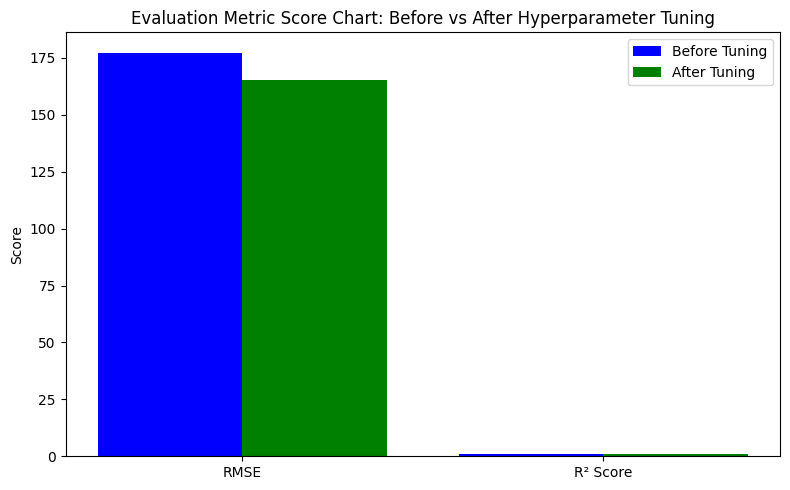

In [ ]:
import matplotlib.pyplot as plt

# Ensure the background is white
plt.style.use('default')  # Reset to the default Matplotlib style (which has a white background)

# Metrics before and after tuning
metrics = ['RMSE', 'R² Score']
before_tuning = [177.39, 0.91]  # Before tuning
after_tuning = [165.25, 0.93]   # After tuning (replace with actual results)

# Plotting the scores
plt.figure(figsize=(8, 5))
x = range(len(metrics))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_tuning, width=0.4, label='After Tuning', color='green', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart: Before vs After Hyperparameter Tuning')
plt.legend()
plt.tight_layout()
plt.show()


Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics and Business Impact

RMSE (Root Mean Squared Error):

What it means: Measures the average error in predictions. Lower RMSE indicates more accurate predictions.

Business Impact: Accurate predictions help optimize bike availability and resource allocation, reducing missed rentals and operational costs.

R² Score:

What it means: Shows how well the model explains the variance in the data. Closer to 1 indicates the model captures most patterns.

Business Impact: A higher R² score (e.g., 0.93) means better demand forecasting, enabling efficient planning for high-demand periods and reducing over-preparation.

Overall Business Impact:
Improved resource allocation and cost efficiency through more accurate and reliable bike demand predictions.







# **Conclusion**

Write the conclusion here.




Based on this analysis of bike-sharing demand, we can conclude that various environmental and temporal factors significantly impact the usage patterns of bike rentals. Seasonal variations, temperature, humidity, and visibility emerged as influential variables, with demand typically peaking during warmer months and under favorable weather conditions. Holiday and operational days also played a role, with rentals generally increasing on holidays and functioning days, reflecting a predictable shift in user behavior on these days.

The predictive models, particularly the Random Forest Regressor after hyperparameter tuning, effectively captured these relationships, demonstrating strong performance in forecasting bike rental demand. This outcome underscores the importance of using advanced machine learning techniques and hyperparameter optimization to achieve reliable predictions in real-world scenarios.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***